<center><font size='20' color='red'>Arboles de Decision</font></center>

In [117]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [99]:
df = pd.read_csv(
    '../Data/cancer.csv'
)

In [100]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
df_m = df[df['diagnosis'] == 'M']
df_b = df[df['diagnosis'] == 'B']

In [102]:
df_b_sample = df_b.sample(212, random_state=32)

In [103]:
df_balanced = pd.concat([df_m, df_b_sample], axis=0)

In [104]:
df_balanced.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [105]:
df_balanced = df_balanced.loc[:, ['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

In [106]:
x = df_balanced.drop('diagnosis', axis=1)
y = df_balanced['diagnosis']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

<font size='15' color='green'>Taller - Modelo Arbol Gini</font>

In [108]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=32).fit(x_train, y_train)

In [109]:
clf.score(x_test, y_test)

0.9058823529411765

In [114]:
prediction = clf.predict(x_test)

In [116]:
accuracy_score(y_test, prediction)

0.9058823529411765

In [118]:
confusion_matrix(y_test, prediction)

array([[46,  3],
       [ 5, 31]])

In [120]:
recall_score(y_test, prediction, pos_label='M')

0.8611111111111112

In [121]:
recall_score(y_test, prediction, pos_label='B')

0.9387755102040817

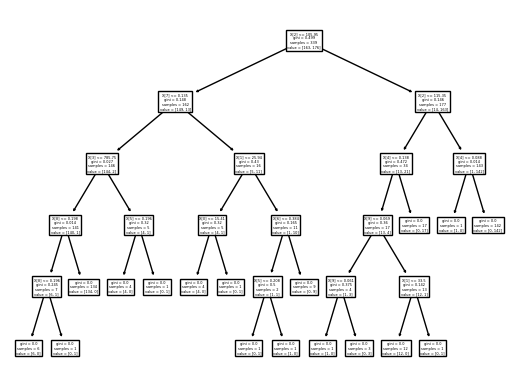

In [110]:
tree.plot_tree(clf)
plt.show()

<font size='15' color='green'>Taller - Modelo Arbol Entropy</font>

In [111]:
clf_2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=32).fit(x_train, y_train)

In [112]:
clf_2.score(x_test, y_test)

0.9294117647058824

In [122]:
prediction_2 = clf_2.predict(x_test)

In [123]:
accuracy_score(y_test, prediction_2)

0.9294117647058824

In [124]:
confusion_matrix(y_test, prediction_2)

array([[45,  4],
       [ 2, 34]])

In [125]:
recall_score(y_test, prediction_2, pos_label='M')

0.9444444444444444

In [126]:
recall_score(y_test, prediction_2, pos_label='B')

0.9183673469387755

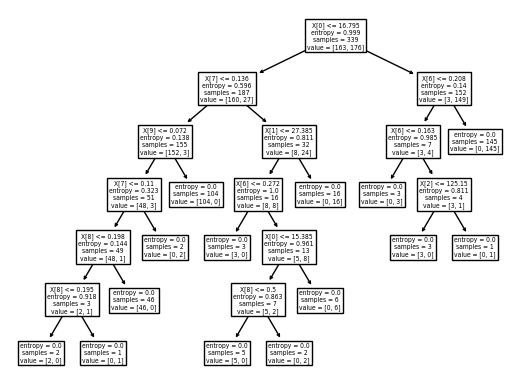

In [113]:
tree.plot_tree(clf_2)
plt.show()

<font size='15' color='Yellow'>Conclusiones</font>

Como se aprecia usando gini tenemos un score de 0.90 mientras que con entropy tenemos un score de 0.92, por lo que podemos concluir que el modelo de arbol de decision usando entropy es mejor que el modelo de arbol de decision usando gini, aun cuando la diferencia es minima